# KNN

In [125]:
"""BreastCancerAI (c) by Roi Dvir
BreastCancerAI is licensed under a Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License.
You should have received a copy of the license along with this work. If not, see <http://creativecommons.org/licenses/by-nc-nd/4.0/>."""


# import libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [126]:
# Sklearn library for implementing Machine Learning models and processing of data
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
#importing the dataset
dataset = pd.read_csv('./data/Breast_Cancer_Data_CSV.csv')
dataset.drop(['ID number'],axis=1,inplace=True)
dataset.head()
print("Cancer data set dimensions : {}".format(dataset.shape))
dataset.head()

Cancer data set dimensions : (569, 31)


,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concave points.mean,symmetry.mean,fractal dimension,...,texture.w,perimeter.w,area.w,smoothness.w,compactness.w,concavity.w,concave points.w,symmetry.w,fractal dimension.w,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [129]:
dataset.head()

,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concave points.mean,symmetry.mean,fractal dimension,...,texture.w,perimeter.w,area.w,smoothness.w,compactness.w,concavity.w,concave points.w,symmetry.w,fractal dimension.w,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [130]:
#features list

In [131]:
features=list(dataset.columns[[7,10,13,15,20,21,22,23,26,27]])
features.append(dataset.columns[-1])
dataset = dataset[features]

In [132]:
dataset

In [133]:
# split dataframe into two based on diagnosis
dfM=dataset[dataset['Diagnosis'] ==1]
dfB=dataset[dataset['Diagnosis'] ==0]
dataset = shuffle(dataset)
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
#Encoding categorical data values 
# split our dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =     0.3, random_state = 0)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
X.shape

(569, 10)

In [135]:
def draw_confusion_matrix(y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
    TN=cm[0,0]
    TP=cm[1,1]
    FN=cm[1,0]
    FP=cm[0,1]
    Acuuracy=round((TN+TP)/float(TN+TP+FN+FP),3)
    Misclassification=1-Acuuracy
    Sensitivity=round(TP/(float(TP+FN)),3)
    Specifity=round(TN/(float(TN+cm[0,1])),3)
    not_detected=round(FN/(FN+TN),5)
    print ('Acuuracy=',Acuuracy,'Sensitivity=', Sensitivity, 'Specifity=' ,Specifity,' notdetected=' , not_detected)
    plt.figure(figsize = (8,5))
    sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [136]:
def values_confusion_matrix(y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
    TN=cm[0,0]
    TP=cm[1,1]
    FN=cm[1,0]
    FP=cm[0,1]
    Accuracy=round((TN+TP)/float(TN+TP+FN+FP),3)
    Misclassification=1-Accuracy
    Sensitivity=round(TP/(float(TP+FN)),3)
    Specifity=round(TN/(float(TN+cm[0,1])),3)
    not_detected=round(FN/(FN+TN),5)
    a=np.array([Accuracy,Sensitivity,Specifity, not_detected])
    return(a)

In [137]:
#K Neighbors Classifier
# The classification score varies based on different values of neighbors that we choose

In [138]:
def find_max_knn_score():
    knn_scores = []
    for k in range(3,15):
        knn_classifier = KNeighborsClassifier(n_neighbors = k)
        knn_classifier.fit(X_train, y_train)
        knn_scores.append(knn_classifier.score(X_test, y_test))
    return (knn_scores.index(max(knn_scores))+3)

In [139]:
find_max_knn_score()

6

In [140]:
def cross_valid_score(n):
    clf = KNeighborsClassifier(n_neighbors = find_max_knn_score())
    scores = cross_val_score(clf, X, Y, cv=n)
    print(scores, 'average=',np.average(scores),'std=', np.std(scores))

In [141]:
cross_valid_score(5)

[0.91304348 0.95652174 0.94690265 0.89380531 0.90265487] average= 0.9225856098499422 std= 0.02473690360265137


In [142]:
def knn_model():
    m=find_max_knn_score()
    knn = KNeighborsClassifier(n_neighbors = m)
    knn.fit(X_train,y_train)
    print("score=",knn.score(X_test, y_test), "n_neighbour=",m)
    y_pred=knn.predict(X_test)
    draw_confusion_matrix(y_test,y_pred)

score= 0.9766081871345029 n_neighbour= 6
Acuuracy= 0.977 Sensitivity= 0.941 Specifity= 1.0  notdetected= 0.03738


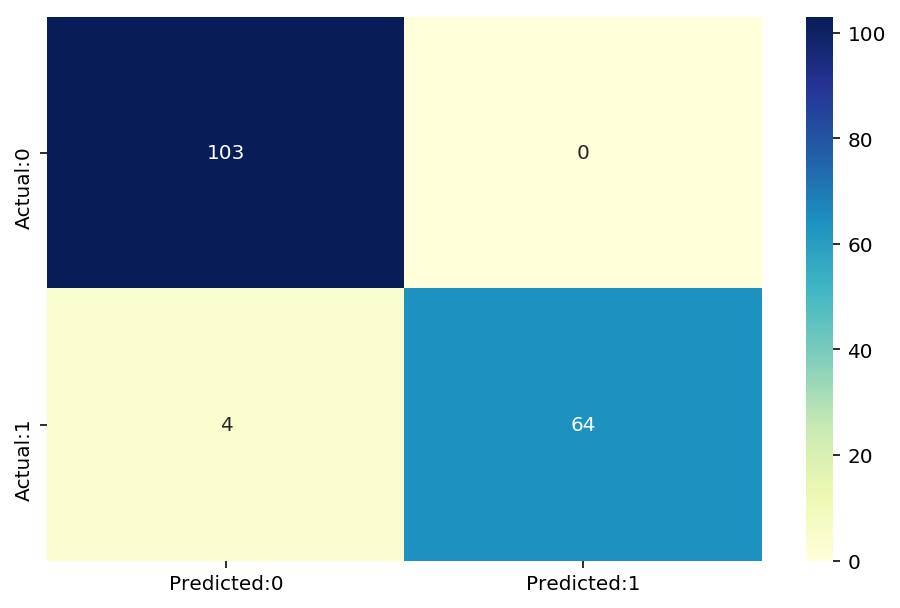

In [143]:
knn_model()

In [144]:
def knn_1():
    m=find_max_knn_score()
    knn = KNeighborsClassifier(n_neighbors = m)
    knn.fit(X_train,y_train)
    print("score=",knn.score(X_test, y_test), "n_neighbour=",m)
    y_pred=knn.predict(X_test)
    return(y_pred)

In [145]:
para=np.zeros([1000,4])
i=0
for i in range (1000):
    dataset1 = shuffle(dataset)
    X = dataset1.iloc[:, :-1].values
    Y = dataset1.iloc[:, -1].values
    labelencoder_Y = LabelEncoder()
    Y = labelencoder_Y.fit_transform(Y)
     #Encoding categorical data values 
    # split our dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =     0.3,     random_state = 0)
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    y_pred=knn_1()
    a=values_confusion_matrix(y_test,y_pred)
    para[i,:]=a
    i=i+1

print(np.average(para, axis=0))
print(np.std(para, axis=0))

score= 0.9766081871345029 n_neighbour= 4
score= 0.9766081871345029 n_neighbour= 3
score= 0.9707602339181286 n_neighbour= 3


score= 0.9766081871345029 n_neighbour= 8
score= 0.9824561403508771 n_neighbour= 5
score= 0.9707602339181286 n_neighbour= 4


score= 0.9766081871345029 n_neighbour= 7
score= 0.9824561403508771 n_neighbour= 3
score= 0.9824561403508771 n_neighbour= 6


score= 0.9824561403508771 n_neighbour= 3
score= 0.9766081871345029 n_neighbour= 6
score= 0.9824561403508771 n_neighbour= 5


score= 0.9824561403508771 n_neighbour= 8
score= 0.9766081871345029 n_neighbour= 5
score= 0.9649122807017544 n_neighbour= 3


score= 0.9590643274853801 n_neighbour= 9
score= 0.9824561403508771 n_neighbour= 7
score= 0.9766081871345029 n_neighbour= 7


score= 0.9707602339181286 n_neighbour= 6
score= 0.9824561403508771 n_neighbour= 7
score= 0.9766081871345029 n_neighbour= 5


score= 0.9824561403508771 n_neighbour= 10
score= 0.9883040935672515 n_neighbour= 3
score= 0.9824561403508771 n_neighbour= 5


score= 0.9824561403508771 n_neighbour= 3
score= 0.9707602339181286 n_neighbour= 7
score= 0.9766081871345029 n_neighbour= 4


score= 0.9824561403508771 n_neighbour= 11
score= 0.9883040935672515 n_neighbour= 5
score= 0.9824561403508771 n_neighbour= 4


score= 0.9941520467836257 n_neighbour= 4
score= 0.9766081871345029 n_neighbour= 5
score= 0.9766081871345029 n_neighbour= 5


score= 0.9824561403508771 n_neighbour= 5
score= 0.9941520467836257 n_neighbour= 4
score= 0.9766081871345029 n_neighbour= 4


score= 0.9707602339181286 n_neighbour= 3
score= 0.9707602339181286 n_neighbour= 3
score= 0.9824561403508771 n_neighbour= 7


score= 0.9824561403508771 n_neighbour= 5
score= 0.9649122807017544 n_neighbour= 11
score= 0.9707602339181286 n_neighbour= 3


score= 0.9883040935672515 n_neighbour= 12
score= 0.9649122807017544 n_neighbour= 11
score= 0.9883040935672515 n_neighbour= 3


score= 0.9649122807017544 n_neighbour= 11
score= 0.9883040935672515 n_neighbour= 5
score= 0.9707602339181286 n_neighbour= 7


score= 0.9766081871345029 n_neighbour= 3
score= 0.9824561403508771 n_neighbour= 14
score= 0.9941520467836257 n_neighbour= 6


score= 0.9824561403508771 n_neighbour= 6
score= 0.9707602339181286 n_neighbour= 7
score= 0.9883040935672515 n_neighbour= 4


score= 0.9766081871345029 n_neighbour= 6
score= 0.9473684210526315 n_neighbour= 3
score= 0.9707602339181286 n_neighbour= 3


score= 0.9766081871345029 n_neighbour= 10
score= 0.9883040935672515 n_neighbour= 9
score= 0.9766081871345029 n_neighbour= 5


score= 0.9766081871345029 n_neighbour= 5
score= 0.9766081871345029 n_neighbour= 5
score= 0.9766081871345029 n_neighbour= 3


score= 0.9649122807017544 n_neighbour= 12
score= 0.9707602339181286 n_neighbour= 4
score= 0.9824561403508771 n_neighbour= 7


score= 0.9649122807017544 n_neighbour= 3
score= 0.9590643274853801 n_neighbour= 5
score= 0.9707602339181286 n_neighbour= 4


score= 0.9649122807017544 n_neighbour= 5
score= 0.9766081871345029 n_neighbour= 5
score= 0.9766081871345029 n_neighbour= 11


score= 0.9649122807017544 n_neighbour= 11
score= 0.9707602339181286 n_neighbour= 5
score= 0.9707602339181286 n_neighbour= 6


score= 0.9766081871345029 n_neighbour= 3
score= 0.9941520467836257 n_neighbour= 8
score= 0.9824561403508771 n_neighbour= 6


score= 0.9766081871345029 n_neighbour= 4
score= 0.9766081871345029 n_neighbour= 4
score= 0.9824561403508771 n_neighbour= 6


score= 0.9590643274853801 n_neighbour= 5
score= 0.9532163742690059 n_neighbour= 5
score= 0.9707602339181286 n_neighbour= 3


score= 0.9707602339181286 n_neighbour= 5
score= 0.9649122807017544 n_neighbour= 4
score= 0.9883040935672515 n_neighbour= 5


score= 0.9824561403508771 n_neighbour= 10
score= 0.9590643274853801 n_neighbour= 5
score= 0.9707602339181286 n_neighbour= 5


score= 0.9707602339181286 n_neighbour= 6
score= 0.9707602339181286 n_neighbour= 7
score= 0.9824561403508771 n_neighbour= 12


score= 0.9941520467836257 n_neighbour= 5
score= 0.9883040935672515 n_neighbour= 13
score= 0.9590643274853801 n_neighbour= 5


score= 0.9883040935672515 n_neighbour= 4
score= 0.9649122807017544 n_neighbour= 5
score= 0.9707602339181286 n_neighbour= 3


score= 0.9766081871345029 n_neighbour= 4
score= 0.9707602339181286 n_neighbour= 14
score= 0.9766081871345029 n_neighbour= 8


score= 0.9824561403508771 n_neighbour= 6
score= 0.9766081871345029 n_neighbour= 5
score= 0.9824561403508771 n_neighbour= 5


score= 0.9883040935672515 n_neighbour= 5
score= 0.9883040935672515 n_neighbour= 9
score= 0.9883040935672515 n_neighbour= 5


score= 0.9590643274853801 n_neighbour= 3
score= 0.9883040935672515 n_neighbour= 7
score= 0.9649122807017544 n_neighbour= 6


score= 0.9707602339181286 n_neighbour= 8
score= 0.9649122807017544 n_neighbour= 7
score= 0.9766081871345029 n_neighbour= 3


score= 0.9941520467836257 n_neighbour= 13
score= 0.9766081871345029 n_neighbour= 6
score= 0.9766081871345029 n_neighbour= 6


score= 0.9766081871345029 n_neighbour= 5
score= 0.9766081871345029 n_neighbour= 5
score= 0.9766081871345029 n_neighbour= 3


score= 0.9824561403508771 n_neighbour= 9
score= 0.9649122807017544 n_neighbour= 7
score= 0.9824561403508771 n_neighbour= 5


score= 0.9707602339181286 n_neighbour= 13
score= 0.9590643274853801 n_neighbour= 3
score= 0.9590643274853801 n_neighbour= 10


score= 0.9707602339181286 n_neighbour= 3
score= 0.9707602339181286 n_neighbour= 5
score= 0.9941520467836257 n_neighbour= 4


score= 0.9766081871345029 n_neighbour= 10
score= 0.9590643274853801 n_neighbour= 10
score= 0.9707602339181286 n_neighbour= 3


score= 0.9649122807017544 n_neighbour= 5
score= 0.9941520467836257 n_neighbour= 5
score= 0.9707602339181286 n_neighbour= 3


score= 0.9649122807017544 n_neighbour= 10
score= 0.9532163742690059 n_neighbour= 4
score= 0.9707602339181286 n_neighbour= 5


score= 0.9883040935672515 n_neighbour= 3
score= 0.9883040935672515 n_neighbour= 5
score= 0.9883040935672515 n_neighbour= 9


score= 0.9766081871345029 n_neighbour= 3
score= 0.9883040935672515 n_neighbour= 7
score= 0.9766081871345029 n_neighbour= 5


score= 0.9707602339181286 n_neighbour= 4
score= 0.9649122807017544 n_neighbour= 8
score= 0.9824561403508771 n_neighbour= 3


score= 0.9707602339181286 n_neighbour= 3
score= 0.9941520467836257 n_neighbour= 14
score= 0.9941520467836257 n_neighbour= 8


score= 0.9707602339181286 n_neighbour= 9
score= 0.9766081871345029 n_neighbour= 8
score= 0.9649122807017544 n_neighbour= 7


score= 0.9941520467836257 n_neighbour= 5
score= 0.9766081871345029 n_neighbour= 5
score= 0.9824561403508771 n_neighbour= 6


score= 0.9766081871345029 n_neighbour= 3
score= 0.9766081871345029 n_neighbour= 11
score= 0.9824561403508771 n_neighbour= 5


score= 0.9824561403508771 n_neighbour= 3
score= 0.9532163742690059 n_neighbour= 4
score= 0.9590643274853801 n_neighbour= 4


score= 0.9883040935672515 n_neighbour= 7
score= 0.9883040935672515 n_neighbour= 6
score= 0.9824561403508771 n_neighbour= 3


score= 0.9766081871345029 n_neighbour= 8
score= 0.9766081871345029 n_neighbour= 3
score= 0.9766081871345029 n_neighbour= 7


score= 0.9824561403508771 n_neighbour= 13
score= 0.9883040935672515 n_neighbour= 5
score= 0.9824561403508771 n_neighbour= 5


score= 0.9766081871345029 n_neighbour= 5
score= 0.9707602339181286 n_neighbour= 3
score= 0.9766081871345029 n_neighbour= 5


score= 0.9766081871345029 n_neighbour= 6
score= 0.9766081871345029 n_neighbour= 5
score= 0.9766081871345029 n_neighbour= 3


score= 0.9824561403508771 n_neighbour= 9
score= 0.9883040935672515 n_neighbour= 11
score= 0.9824561403508771 n_neighbour= 7


score= 0.9883040935672515 n_neighbour= 5
score= 0.9649122807017544 n_neighbour= 3
score= 0.9766081871345029 n_neighbour= 9


score= 0.9707602339181286 n_neighbour= 5
score= 0.9824561403508771 n_neighbour= 4


score= 0.9707602339181286 n_neighbour= 4
score= 0.9824561403508771 n_neighbour= 3
score= 0.9824561403508771 n_neighbour= 3


score= 0.9883040935672515 n_neighbour= 4
score= 0.9649122807017544 n_neighbour= 4
score= 0.9883040935672515 n_neighbour= 4


score= 0.9766081871345029 n_neighbour= 10
score= 0.9824561403508771 n_neighbour= 4
score= 0.9707602339181286 n_neighbour= 5


score= 0.9824561403508771 n_neighbour= 9
score= 0.9707602339181286 n_neighbour= 4
score= 0.9766081871345029 n_neighbour= 7


score= 0.9824561403508771 n_neighbour= 5
score= 0.9649122807017544 n_neighbour= 7
score= 0.9707602339181286 n_neighbour= 3


score= 0.9883040935672515 n_neighbour= 5
score= 0.9941520467836257 n_neighbour= 5
score= 0.9707602339181286 n_neighbour= 3


score= 0.9883040935672515 n_neighbour= 10
score= 0.9649122807017544 n_neighbour= 6
score= 0.9766081871345029 n_neighbour= 9


score= 0.9824561403508771 n_neighbour= 7
score= 0.9883040935672515 n_neighbour= 5
score= 0.9707602339181286 n_neighbour= 10


score= 0.9649122807017544 n_neighbour= 3
score= 0.9824561403508771 n_neighbour= 9
score= 0.9766081871345029 n_neighbour= 6


score= 0.9824561403508771 n_neighbour= 9
score= 0.9824561403508771 n_neighbour= 3
score= 0.9590643274853801 n_neighbour= 3


score= 0.9766081871345029 n_neighbour= 3
score= 0.9649122807017544 n_neighbour= 3
score= 0.9707602339181286 n_neighbour= 11


score= 0.9766081871345029 n_neighbour= 3
score= 0.9766081871345029 n_neighbour= 6
score= 0.9766081871345029 n_neighbour= 3


score= 0.9883040935672515 n_neighbour= 3
score= 0.9707602339181286 n_neighbour= 5
score= 0.9824561403508771 n_neighbour= 10


score= 0.9766081871345029 n_neighbour= 7
score= 0.9941520467836257 n_neighbour= 4
score= 0.9766081871345029 n_neighbour= 5


score= 0.9707602339181286 n_neighbour= 3
score= 0.9707602339181286 n_neighbour= 4
score= 0.9824561403508771 n_neighbour= 8


score= 0.9707602339181286 n_neighbour= 4
score= 0.9883040935672515 n_neighbour= 8
score= 0.9532163742690059 n_neighbour= 3


score= 0.9883040935672515 n_neighbour= 5
score= 0.9707602339181286 n_neighbour= 6
score= 0.9707602339181286 n_neighbour= 6


score= 1.0 n_neighbour= 6
score= 0.9883040935672515 n_neighbour= 5
score= 0.9766081871345029 n_neighbour= 3


score= 0.9766081871345029 n_neighbour= 3
score= 0.9766081871345029 n_neighbour= 3
score= 0.9824561403508771 n_neighbour= 4


score= 0.9649122807017544 n_neighbour= 5
score= 0.9590643274853801 n_neighbour= 5


score= 0.9883040935672515 n_neighbour= 8
score= 0.9824561403508771 n_neighbour= 5
score= 0.9766081871345029 n_neighbour= 7


score= 0.9824561403508771 n_neighbour= 5
score= 0.9883040935672515 n_neighbour= 14
score= 0.9707602339181286 n_neighbour= 9


score= 0.9824561403508771 n_neighbour= 3
score= 0.9707602339181286 n_neighbour= 5
score= 0.9883040935672515 n_neighbour= 7


score= 0.9824561403508771 n_neighbour= 9
score= 0.9766081871345029 n_neighbour= 9
score= 0.9707602339181286 n_neighbour= 5


score= 0.9766081871345029 n_neighbour= 3
score= 0.9883040935672515 n_neighbour= 6
score= 0.9649122807017544 n_neighbour= 3


score= 0.9766081871345029 n_neighbour= 5
score= 0.9824561403508771 n_neighbour= 11
score= 0.9707602339181286 n_neighbour= 8


score= 0.9707602339181286 n_neighbour= 3
score= 0.9590643274853801 n_neighbour= 7
score= 0.9824561403508771 n_neighbour= 7


score= 0.9766081871345029 n_neighbour= 6
score= 0.9766081871345029 n_neighbour= 3
score= 0.9766081871345029 n_neighbour= 9


score= 0.9824561403508771 n_neighbour= 6
score= 0.9707602339181286 n_neighbour= 13
score= 0.9766081871345029 n_neighbour= 3


score= 0.9766081871345029 n_neighbour= 5
score= 0.9883040935672515 n_neighbour= 5
score= 0.9649122807017544 n_neighbour= 3


score= 0.9649122807017544 n_neighbour= 5
score= 0.9883040935672515 n_neighbour= 4
score= 0.9707602339181286 n_neighbour= 13


score= 0.9883040935672515 n_neighbour= 5
score= 0.9707602339181286 n_neighbour= 3
score= 0.9707602339181286 n_neighbour= 10


score= 0.9766081871345029 n_neighbour= 3
score= 0.9649122807017544 n_neighbour= 3
score= 0.9824561403508771 n_neighbour= 4


score= 0.9766081871345029 n_neighbour= 3
score= 0.9707602339181286 n_neighbour= 3
score= 0.9766081871345029 n_neighbour= 6


score= 0.9824561403508771 n_neighbour= 5
score= 0.9766081871345029 n_neighbour= 9
score= 0.9883040935672515 n_neighbour= 9


score= 0.9766081871345029 n_neighbour= 3
score= 0.9766081871345029 n_neighbour= 11
score= 0.9824561403508771 n_neighbour= 9


score= 0.9824561403508771 n_neighbour= 4
score= 0.9766081871345029 n_neighbour= 11
score= 0.9824561403508771 n_neighbour= 9


score= 0.9766081871345029 n_neighbour= 7
score= 0.9766081871345029 n_neighbour= 9
score= 0.9766081871345029 n_neighbour= 4


score= 0.9707602339181286 n_neighbour= 3
score= 0.9824561403508771 n_neighbour= 3
score= 0.9766081871345029 n_neighbour= 13


score= 0.9883040935672515 n_neighbour= 13
score= 0.9766081871345029 n_neighbour= 5
score= 0.9766081871345029 n_neighbour= 9


score= 0.9766081871345029 n_neighbour= 8
score= 0.9824561403508771 n_neighbour= 5
score= 0.9824561403508771 n_neighbour= 11


score= 0.9766081871345029 n_neighbour= 5
score= 0.9707602339181286 n_neighbour= 11
score= 0.9766081871345029 n_neighbour= 9


score= 0.9941520467836257 n_neighbour= 3
score= 0.9649122807017544 n_neighbour= 5
score= 0.9824561403508771 n_neighbour= 5


score= 0.9824561403508771 n_neighbour= 5
score= 0.9883040935672515 n_neighbour= 6
score= 0.9649122807017544 n_neighbour= 3


score= 0.9824561403508771 n_neighbour= 4
score= 0.9766081871345029 n_neighbour= 4
score= 0.9649122807017544 n_neighbour= 8


score= 0.9707602339181286 n_neighbour= 3
score= 0.9883040935672515 n_neighbour= 11
score= 0.9766081871345029 n_neighbour= 6


score= 0.9707602339181286 n_neighbour= 7
score= 0.9766081871345029 n_neighbour= 5
score= 0.9824561403508771 n_neighbour= 6


score= 0.9766081871345029 n_neighbour= 11
score= 0.9766081871345029 n_neighbour= 9
score= 0.9824561403508771 n_neighbour= 8


score= 0.9707602339181286 n_neighbour= 3
score= 0.9707602339181286 n_neighbour= 4


score= 0.9883040935672515 n_neighbour= 10
score= 0.9707602339181286 n_neighbour= 3
score= 0.9707602339181286 n_neighbour= 5


score= 0.9532163742690059 n_neighbour= 3
score= 0.9824561403508771 n_neighbour= 5
score= 0.9766081871345029 n_neighbour= 5


score= 0.9824561403508771 n_neighbour= 6
score= 0.9649122807017544 n_neighbour= 7
score= 0.9883040935672515 n_neighbour= 5


score= 0.9590643274853801 n_neighbour= 6
score= 0.9824561403508771 n_neighbour= 7
score= 0.9707602339181286 n_neighbour= 7


score= 0.9707602339181286 n_neighbour= 5
score= 0.9824561403508771 n_neighbour= 4
score= 0.9766081871345029 n_neighbour= 5


score= 0.9707602339181286 n_neighbour= 6
score= 0.9649122807017544 n_neighbour= 8
score= 0.9532163742690059 n_neighbour= 5


score= 0.9883040935672515 n_neighbour= 3
score= 0.9824561403508771 n_neighbour= 9


score= 0.9766081871345029 n_neighbour= 3
score= 0.9883040935672515 n_neighbour= 5
score= 0.9883040935672515 n_neighbour= 7


score= 0.9707602339181286 n_neighbour= 11
score= 0.9649122807017544 n_neighbour= 5
score= 0.9766081871345029 n_neighbour= 6


score= 0.9766081871345029 n_neighbour= 7
score= 0.9766081871345029 n_neighbour= 4


score= 0.9649122807017544 n_neighbour= 13
score= 0.9941520467836257 n_neighbour= 5
score= 0.9766081871345029 n_neighbour= 11


score= 0.9707602339181286 n_neighbour= 3
score= 0.9766081871345029 n_neighbour= 4
score= 0.9707602339181286 n_neighbour= 12


score= 0.9883040935672515 n_neighbour= 5
score= 0.9941520467836257 n_neighbour= 13
score= 0.9824561403508771 n_neighbour= 14


score= 0.9649122807017544 n_neighbour= 9
score= 0.9941520467836257 n_neighbour= 9
score= 0.9824561403508771 n_neighbour= 9


score= 0.9824561403508771 n_neighbour= 3
score= 0.9941520467836257 n_neighbour= 5
score= 0.9883040935672515 n_neighbour= 5


score= 0.9824561403508771 n_neighbour= 5
score= 0.9707602339181286 n_neighbour= 3
score= 0.9766081871345029 n_neighbour= 6


score= 0.9824561403508771 n_neighbour= 10
score= 0.9707602339181286 n_neighbour= 3
score= 0.9883040935672515 n_neighbour= 3


score= 0.9824561403508771 n_neighbour= 5
score= 0.9824561403508771 n_neighbour= 9
score= 0.9766081871345029 n_neighbour= 3


score= 0.9707602339181286 n_neighbour= 5
score= 0.9707602339181286 n_neighbour= 3
score= 0.9707602339181286 n_neighbour= 13


score= 0.9707602339181286 n_neighbour= 3
score= 0.9766081871345029 n_neighbour= 8
score= 0.9824561403508771 n_neighbour= 6


In [146]:
#features=list(dataset.columns[0:30])
#score= 0.9766081871345029 n_neighbour= 3
#Acuuracy= 0.977 Sensitivity= 0.952 Specifity= 0.991  notdetected= 0.02727

#score= 0.9649122807017544 n_neighbour= 3
#Acuuracy= 0.965 Sensitivity= 0.902 Specifity= 1.0  notdetected= 0.05172

#score= 0.9707602339181286 n_neighbour= 7
#Acuuracy= 0.971 Sensitivity= 0.924 Specifity= 1.0  notdetected= 0.04545

#score= 0.9824561403508771 n_neighbour= 4
#Acuuracy= 0.982 Sensitivity= 0.952 Specifity= 1.0  notdetected= 0.02703

#score= 0.9766081871345029 n_neighbour= 5
#Acuuracy= 0.977 Sensitivity= 0.937 Specifity= 1.0  notdetected= 0.03571

In [147]:
#features=list(dataset.columns[20:30])
# Acuuracy= 0.971 Sensitivity= 0.939 Specifity= 0.99  notdetected= 0.03704
#Acuuracy= 0.977 Sensitivity= 0.984 Specifity= 0.972  notdetected= 0.00943
#Acuuracy= 0.953 Sensitivity= 0.913 Specifity= 0.98  notdetected= 0.0566
#Acuuracy= 0.971 Sensitivity= 0.919 Specifity= 1.0  notdetected= 0.04386
#Acuuracy= 0.971 Sensitivity= 0.938 Specifity= 0.991  notdetected= 0.03636

In [148]:
#features=list(dataset.columns[[20,21,23, 24,25,26,27]])

#Acuuracy= 0.971 Sensitivity= 0.953 Specifity= 0.981  notdetected= 0.02778
#Acuuracy= 0.977 Sensitivity= 0.97 Specifity= 0.981  notdetected= 0.01923
#Acuuracy= 0.971 Sensitivity= 0.966 Specifity= 0.973  notdetected= 0.01802
#Acuuracy= 0.982 Sensitivity= 0.964 Specifity= 0.991  notdetected= 0.01709
#Acuuracy= 0.971 Sensitivity= 0.956 Specifity= 0.981  notdetected= 0.02885